/mnt/OpenFormat/python


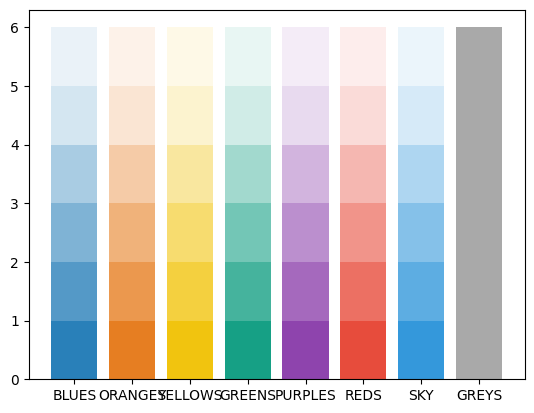

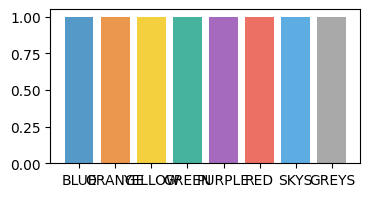

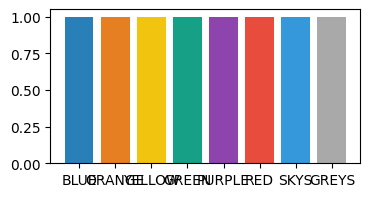

<Figure size 400x200 with 0 Axes>

In [1]:
import json
import os, pathlib
import sys
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dir_path = pathlib.Path(os.path.abspath('')).parent.resolve()
print(dir_path)
HOME_DIR = str(dir_path).split('/OpenFormat')[0]
PROJ_SRC_DIR = f'{HOME_DIR}/OpenFormat'
sys.path.insert(1, f'{PROJ_SRC_DIR}')
from python.scripts.utils import *


from stylelib import *
from process_helper import *
_, grad_colors = display_colors()
_, bar_colors = select_color_idx(4)
_, line_colors = select_color_idx(5)
colors = [REDS[5],REDS[2],BLUES[5],BLUES[2]]

In [2]:
name =  'outputs/encoding_size_concat.csv'
os.chdir(f'{PROJ_SRC_DIR}/python/')
df = pd.read_csv(name)
df_avg = df.groupby(['feature', 'type','param', 'file'], as_index=False).mean().set_index(['feature', 'type','file'])


/tmp/ipykernel_106236/1070238441.py:44: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax[i].set_ylim(bottom=0)


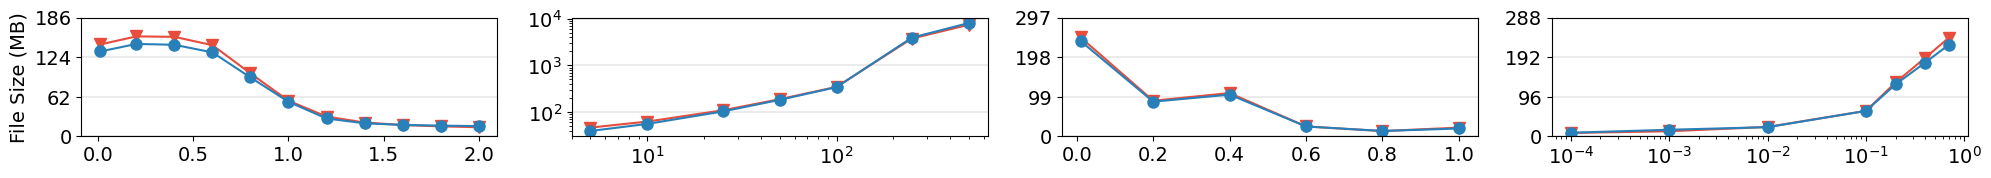

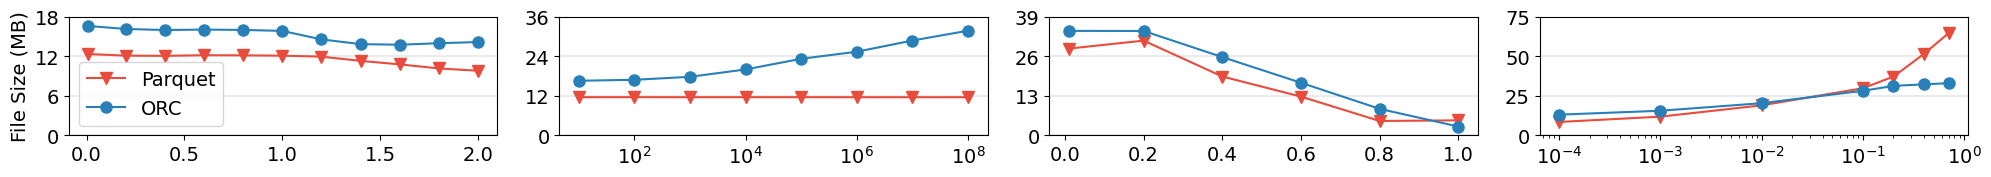

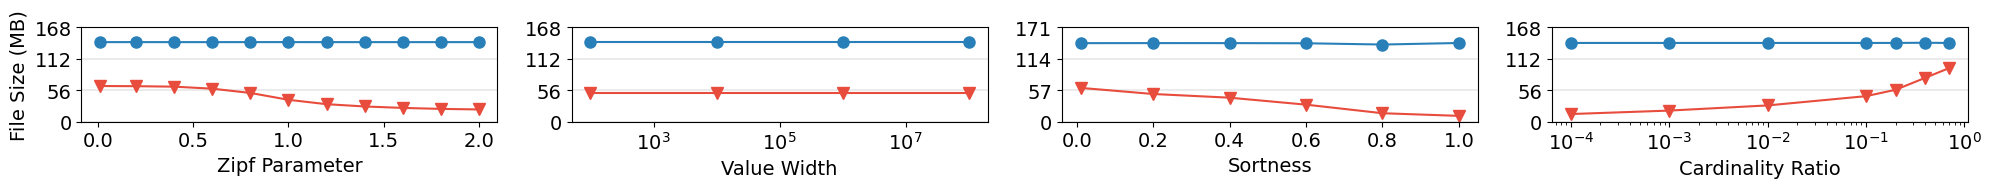

In [37]:
from genericpath import exists
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
type_list = ['string', 'int', 'float']
type_to_df_type = {'string': 'object', 'int': 'int64', 'float': 'float64'}
fea_list = ['zipf', 'width', 'sort', 'car']
fea_to_good_fea = {'zipf': 'Zipf Parameter', 'width': 'Value Width', 'sort': 'Sortness', 'car': 'Cardinality Ratio'}
# fea_list = ['zipf', 'width', 'sort', 'car']
for j, t in enumerate(type_list):
    fig, ax = plt.subplots(1, 4, figsize=(5*4, 2))
    for i, fea in enumerate(fea_list):
        # print(f'[LOG] Generating {fea} config, index {i}')
        
        # plot and save fig
        # ax.plot(param_list, size_ratio, marker='o', label='orc/pq ratio')
        # ax.set(xlabel=fea, ylabel='orc size / pq size')
        # core_ratio = df_avg.loc['core', t, 'orc']['size'][0] / df_avg.loc['core', t, 'parquet']['size'][0]
        # ax.set_title(f'{t} varying {fea}, core ratio: %.2f'%core_ratio, y=1.08)
        # # ax.set_ylim(bottom=0)
        if fea == 'width' or fea == 'car':
            ax[i].set_xscale('log')
        if fea =='width' and t =='string':
            ax[i].set_yscale('log')
        # ax.hlines([core_ratios[t]], ax.get_xlim()[0], ax.get_xlim()[1], color='r', label='core dataset')
        # ax.legend(loc="upper left", bbox_to_anchor=((-0.01,1.1)), ncol=2, columnspacing=1, frameon=False)
        # ax2=ax.twinx()
        # make a plot with different y-axis using second axis object
        
        # delete value in df_avg.loc[fea, t, 'orc']['param'] if it mod 2 equals 0
        pq_size = df_avg.loc[fea, t, 'parquet']['size']/1024/1024
        orc_size = df_avg.loc[fea, t, 'orc']['size']/1024/1024
        ax[i].plot(df_avg.loc[fea, t, 'orc']['param'], pq_size,color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
        ax[i].plot(df_avg.loc[fea, t, 'orc']['param'], orc_size,color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
        speedup_xspace, speedup_yspace = 0, 0.1
    #     print(speedup_over_default)
    #     print(speedup_over_for)
        # for x, y, s in zip([r for r in df_avg.loc[fea, t, 'orc']['param']], df_avg.loc[fea, t, 'orc']['size'], size_ratio):
        #     ax.text(x + speedup_xspace, y + speedup_yspace, "%.1f"%(s), fontsize=12)
        # ax.text()
        if j == len(type_list) - 1:
            ax[i].set_xlabel(fea_to_good_fea[fea])
        ax[i].set_ylim(bottom=0)
        # ax.legend(loc="upper left", bbox_to_anchor=((0,1.1)), ncol=2, columnspacing=1, frameon=False)
        # ax[i].set_title(f'{t} varying {fea}', y=1.08)
        if i == 0:
            ax[i].set_ylabel("File Size (MB)", fontsize=14)
        if i == 0 and t == 'int':
            ax[i].legend()
        ax[i].set_axisbelow(True)
        ax[i].grid(axis='y', linewidth=0.35)
        # Set the y-axis ticks
        max_y = ax[i].get_ylim()[1]
        if not (fea =='width' and t =='string'):
            ax[i].set_yticks(range(0, int(max_y*1.15)+1, int(max_y*1.15/3)))
    if not os.path.exists('figures'):
        os.mkdir('figures')
    # plt.title(f'{t}')
    plt.tight_layout()
    plt.savefig(f'figures/encoding_size/{t}.pdf', bbox_inches='tight')
    plt.show()

# version 2: separate figures

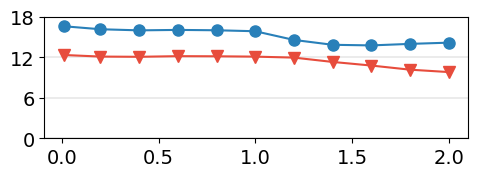

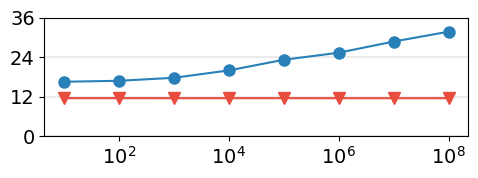

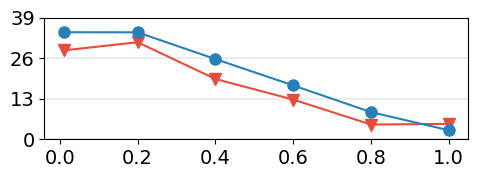

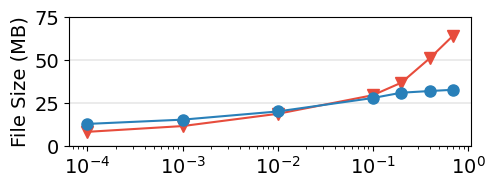

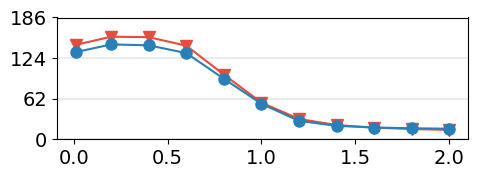

/tmp/ipykernel_668883/1019538712.py:42: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(bottom=0)


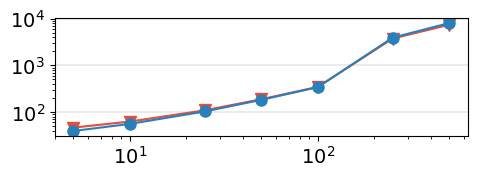

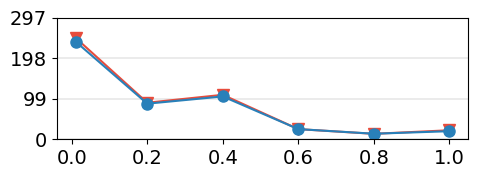

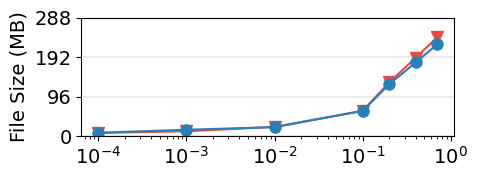

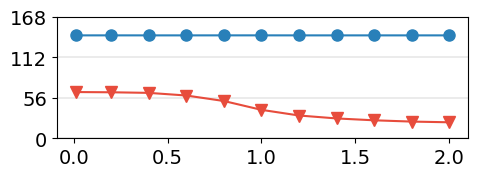

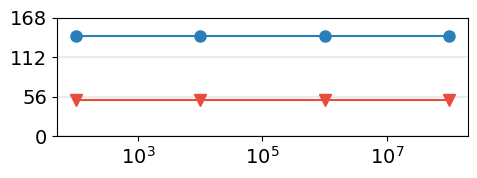

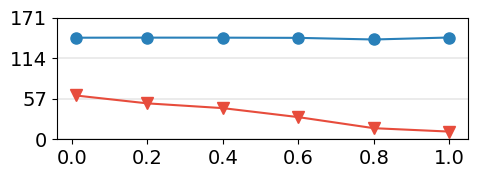

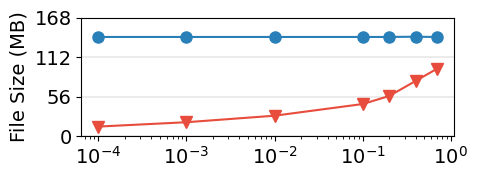

In [3]:
from genericpath import exists
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
type_list = ['int', 'string', 'float']
type_to_df_type = {'string': 'object', 'int': 'int64', 'float': 'float64'}
fea_list = ['zipf', 'width', 'sort', 'car']
fea_to_good_fea = {'zipf': 'Zipf Parameter', 'width': 'Value Width', 'sort': 'Sortness', 'car': 'Cardinality Ratio'}
# fea_list = ['zipf', 'width', 'sort', 'car']
for j, t in enumerate(type_list):
    for i, fea in enumerate(fea_list):
        fig, ax = plt.subplots(1, 1, figsize=(5, 2))
        # print(f'[LOG] Generating {fea} config, index {i}')
        
        # plot and save fig
        # ax.plot(param_list, size_ratio, marker='o', label='orc/pq ratio')
        # ax.set(xlabel=fea, ylabel='orc size / pq size')
        # core_ratio = df_avg.loc['core', t, 'orc']['size'][0] / df_avg.loc['core', t, 'parquet']['size'][0]
        # ax.set_title(f'{t} varying {fea}, core ratio: %.2f'%core_ratio, y=1.08)
        # # ax.set_ylim(bottom=0)
        if fea == 'width' or fea == 'car':
            ax.set_xscale('log')
        if fea =='width' and t =='string':
            ax.set_yscale('log')
        # ax.hlines([core_ratios[t]], ax.get_xlim()[0], ax.get_xlim()[1], color='r', label='core dataset')
        # ax.legend(loc="upper left", bbox_to_anchor=((-0.01,1.1)), ncol=2, columnspacing=1, frameon=False)
        # ax2=ax.twinx()
        # make a plot with different y-axis using second axis object
        
        # delete value in df_avg.loc[fea, t, 'orc']['param'] if it mod 2 equals 0
        ax.plot(df_avg.loc[fea, t, 'orc']['param'], df_avg.loc[fea, t, 'parquet']['size']/1024/1024,color=line_colors[C_PQ],marker="v", label='Parquet',ls='-', ms=8)
        ax.plot(df_avg.loc[fea, t, 'orc']['param'], df_avg.loc[fea, t, 'orc']['size']/1024/1024,color=line_colors[C_ORC],marker="o", label='ORC',ls='-', ms=8)
        speedup_xspace, speedup_yspace = 0, 0.1
    #     print(speedup_over_default)
    #     print(speedup_over_for)
        # for x, y, s in zip([r for r in df_avg.loc[fea, t, 'orc']['param']], df_avg.loc[fea, t, 'orc']['size'], size_ratio):
        #     ax.text(x + speedup_xspace, y + speedup_yspace, "%.1f"%(s), fontsize=12)
        # ax.text()
        # if j == len(type_list) - 1:
        #     ax.set_xlabel(fea_to_good_fea[fea])
        ax.set_ylim(bottom=0)
        # ax.legend(loc="upper left", bbox_to_anchor=((0,1.1)), ncol=2, columnspacing=1, frameon=False)
        # ax[i].set_title(f'{t} varying {fea}', y=1.08)
        if fea == 'car':
            ax.set_ylabel("File Size (MB)", fontsize=14)
            if t == 'int':
                legend = ax.legend(frameon=False, ncol=2)
                export_legend(legend, "figures/encoding_size/legend.pdf")
                legend.remove()
        max_y = ax.get_ylim()[1]
        if not (fea =='width' and t =='string'):
            ax.set_yticks(range(0, int(max_y*1.15)+1, int(max_y*1.15/3)))
        ax.set_axisbelow(True)
        ax.grid(axis='y', linewidth=0.35)
        if not os.path.exists('figures'):
            os.mkdir('figures')
        # plt.title(f'{t}')
        plt.tight_layout()
        plt.savefig(f'figures/encoding_size/{t}_{fea}.pdf', bbox_inches='tight')
        plt.show()

# RLE breakdown

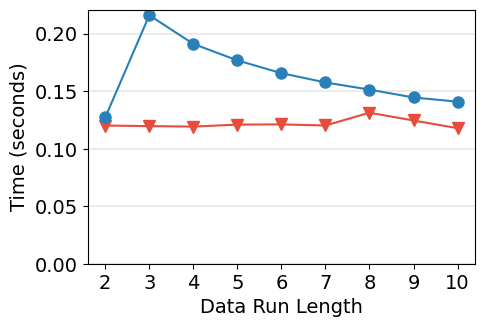

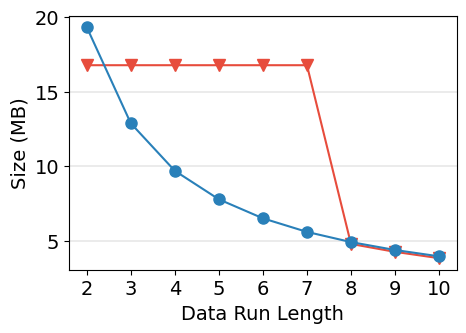

In [87]:
fig, ax = plt.subplots(figsize=(5,3.3))
df = pd.read_csv(f'{PROJ_SRC_DIR}/python/outputs/decode_rle.csv')
df_avg = df.groupby(['run', 'file'], as_index=False).mean().set_index(['run', 'file'])
time_orc = []
time_parquet = []
preload_time_orc = []
preload_time_parquet = []
size_orc = []
size_parquet = []
run_list = df_avg.index.get_level_values('run').unique()
for j, t in enumerate(run_list):
    time_orc.append(df_avg.loc[t, 'orc']['read_time'])
    time_parquet.append(df_avg.loc[t, 'parquet']['read_time'])
    preload_time_orc.append(df_avg.loc[t, 'orc']['read_time_preload'])
    preload_time_parquet.append(df_avg.loc[t, 'parquet']['read_time_preload'])
    size_orc.append(df_avg.loc[t, 'orc']['size'] / 1024 / 1024)
    size_parquet.append(df_avg.loc[t, 'parquet']['size']/ 1024 / 1024)

# Make the plot
ax.plot(run_list, time_parquet, color = colors[0], marker="v", label='Parquet',ls='-', ms=8)
ax.plot(run_list, time_orc, color = colors[2], marker="o", label='ORC',ls='-', ms=8)

ax.set_ylabel('Time (seconds)', fontsize=14)
ax.set_xlabel('Data Run Length', fontsize=14)
# ax.set_title('none', fontsize=14)
ax.set_xticks(run_list)
ax.set_yticks(np.arange(0, 0.25, 0.05))
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
# ax.set_ylim(ymax=0.2)
# ax.legend(columnspacing=0.5, ncol=2, frameon=True, fontsize=12)
plt.savefig(f'{PROJ_SRC_DIR}/python/figures/decode_rle.pdf', bbox_inches='tight')
plt.show()

# fig, ax = plt.subplots(figsize=(3, 2.5))
fig, ax = plt.subplots(figsize=(5,3.3))
colors_size = [PURPLES[5],PURPLES[2],YELLOWS[5],YELLOWS[2]]
ax.plot(run_list, size_parquet, color = colors[0], marker="v", label='Parquet',ls='-', ms=8)
ax.plot(run_list, size_orc, color = colors[2], marker="o", label='ORC',ls='-', ms=8)
ax.set_ylabel('Size (MB)', fontsize=14)
ax.set_xlabel('Data Run Length', fontsize=14)
# ax.set_title('none', fontsize=14)
# ax.set_yticks(np.arange(0, 0.25, 0.05))
ax.set_xticks(run_list)
ax.set_axisbelow(True)
ax.grid(axis='y', linewidth=0.35)
# ax.set_ylim(ymax=0.2)
# ax.legend(columnspacing=0.5, ncol=1, frameon=False, fontsize=12)
legend=ax.legend(columnspacing=0.5, ncol=2, frameon=False, fontsize=12, bbox_to_anchor=(0.5, 1.22), loc='upper center')
export_legend(legend, f'{PROJ_SRC_DIR}/python/figures/rle_legend.pdf')
legend.remove()
plt.savefig(f'{PROJ_SRC_DIR}/python/figures/decode_rle_size.pdf', bbox_inches='tight')
plt.show()

# Scan time, separate subfigures, int first

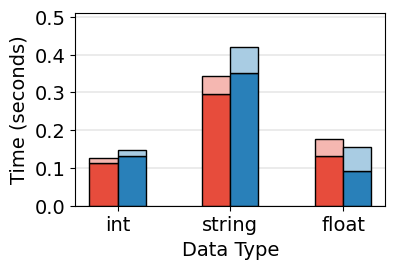

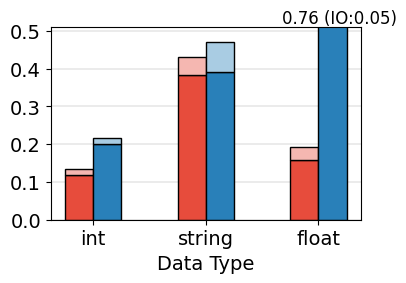

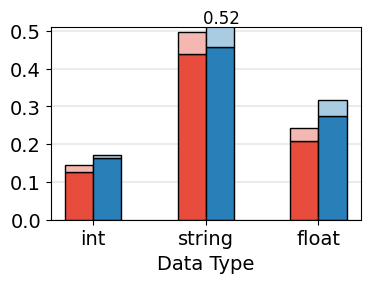

In [77]:
df = pd.read_csv(f'{PROJ_SRC_DIR}/python/outputs/decode_speed_compression.csv')
compresion_list = df['compression'].unique()
compresion_list = list(compresion_list)
compresion_list.remove('none')
compresion_list.remove('lz4')
compresion_list.insert(0, 'none')
for i, c in enumerate(compresion_list): 
    fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))   
    tmp_df = df[df['compression']==c]
    df_avg = tmp_df.groupby(['workload', 'file'], as_index=False).mean().set_index(['workload', 'file'])
    size_orc = []
    size_parquet = []
    preload_time_orc = []
    preload_time_parquet = []
    for j, t in enumerate(type_list):
        size_orc.append(df_avg.loc[t, 'orc']['read_time'])
        size_parquet.append(df_avg.loc[t, 'parquet']['read_time'])
        preload_time_orc.append(df_avg.loc[t, 'orc']['read_time_preload'])
        preload_time_parquet.append(df_avg.loc[t, 'parquet']['read_time_preload'])


    barWidth = 0.25
    br1 = np.arange(len(size_orc))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    ax.bar(br1, preload_time_parquet, color = colors[0], width = barWidth,
            edgecolor ='black', label ='Parquet_Decode')
    ax.bar(br1, [b - a for a, b in zip(preload_time_parquet, size_parquet)], color = colors[1], width = barWidth, bottom=preload_time_parquet,
            edgecolor ='black', label ='Parquet_IO')
    ax.bar(br2, preload_time_orc, color = colors[2], width = barWidth,
            edgecolor ='black', label ='ORC_Decode')
    ax.bar(br2, [b - a for a, b in zip(preload_time_orc, size_orc)], color = colors[3], width = barWidth, bottom=preload_time_orc,
            edgecolor ='black', label ='ORC_IO')
    ax.set_xticks([r + 0.5*barWidth for r in range(len(preload_time_orc))],
            type_list)
    if i == 0:
        ax.set_ylabel('Time (seconds)', fontsize=14)
    ax.set_xlabel('Data Type', fontsize=14)
    # ax.set_title(c, fontsize=14)
    ax.set_ylim(ymax=0.51)
    ax.set_yticks(np.arange(0, 0.6, 0.1))
    ax.set_axisbelow(True)
    ax.grid(axis='y', linewidth=0.35)
    if i == 1:
        ax.text(x=1.8, y=0.52, s="{:.2} (IO:{:.1})".format(size_orc[2], size_orc[2]-preload_time_orc[2]), fontsize=12)
    if i ==2:
        ax.text(x=1.1, y=0.52, s="{:.2} ".format(size_orc[1]), fontsize=12)
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, bbox_to_anchor=(0.5, 1.3),
            columnspacing=0.5, ncol=4, frameon=False, fontsize=12,  loc='upper center')
    export_legend(legend, "figures/time_encoding_legend.pdf")
    legend.remove()
    plt.savefig(f'figures/time_encoding_{c}.pdf', bbox_inches='tight')
    plt.show()

# Size varying comprssion

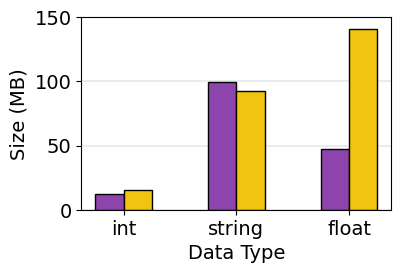

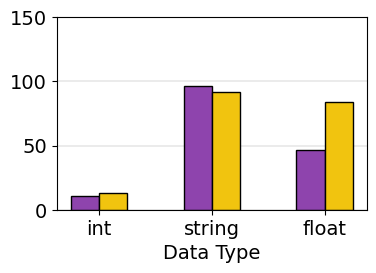

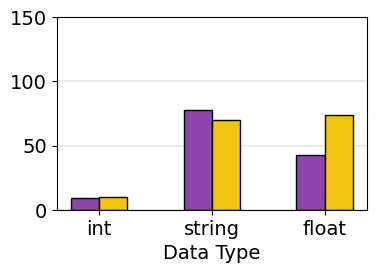

In [81]:
compresion_list = df['compression'].unique()
compresion_list = list(compresion_list)
compresion_list.remove('none')
compresion_list.remove('lz4')
compresion_list.insert(0, 'none')
colors_size = [PURPLES[5],PURPLES[2],YELLOWS[5],YELLOWS[2]]
for i, c in enumerate(compresion_list): 
    fig, ax = plt.subplots(1, 1, figsize=(4, 2.5))   
    tmp_df = df[df['compression']==c]
    df_avg = tmp_df.groupby(['workload', 'file'], as_index=False).mean().set_index(['workload', 'file'])
    size_orc = []
    size_parquet = []
    for j, t in enumerate(type_list):
        size_orc.append(df_avg.loc[t, 'orc']['size'] / 1024 / 1024)
        size_parquet.append(df_avg.loc[t, 'parquet']['size'] / 1024 / 1024)


    barWidth = 0.25
    br1 = np.arange(len(size_orc))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    ax.bar(br1, size_parquet, color = colors_size[0], width = barWidth,
            edgecolor ='black', label ='Parquet')
    ax.bar(br2, size_orc, color = colors_size[2], width = barWidth,
            edgecolor ='black', label ='ORC')
    ax.set_xticks([r + 0.5*barWidth for r in range(len(preload_time_orc))],
            type_list)
    if i == 0:
        ax.set_ylabel('Size (MB)', fontsize=14)
    ax.set_xlabel('Data Type', fontsize=14)
    # ax.set_title(c, fontsize=14)
    # ax.set_ylim(ymax=0.51)
    ax.set_yticks(np.arange(0, 200, 50))
    ax.set_axisbelow(True)
    ax.grid(axis='y', linewidth=0.35)
    # if i == 1:
    #     ax.text(x=1.8, y=0.52, s="{:.2} (IO:{:.1})".format(size_orc[2], size_orc[2]-preload_time_orc[2]), fontsize=12)
    # if i ==2:
    #     ax.text(x=1.1, y=0.52, s="{:.2} ".format(size_orc[1]), fontsize=12)
    handles, labels = ax.get_legend_handles_labels()
    legend = ax.legend(handles, labels, bbox_to_anchor=(0.5, 1.3),
            columnspacing=0.5, ncol=4, frameon=False, fontsize=12,  loc='upper center')
    export_legend(legend, "figures/size_encoding_legend.pdf")
    legend.remove()
    plt.savefig(f'figures/size_encoding_{c}.pdf', bbox_inches='tight')
    plt.show()